# Heart Disease Classification Model

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

> The original data from the Cleveland data from the UCI Machine Learning Repository.
> https://archive.ics.uci.edu/dataset/45/heart+disease


## 3. Features
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
> 0: Typical angina: chest pain related decrease blood supply to the heart
> 1: Atypical angina: chest pain not related to heart
> 2: Non-anginal pain: typically esophageal spasms (non heart related)
> 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
>anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
>serum = LDL + HDL + .2 * triglycerides
>above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
> 0: Nothing to note
> 1: ST-T Wave abnormality
>> can range from mild symptoms to severe problems
>> signals non-normal heart beat
> 2: Possible or definite left ventricular hypertrophy
>> Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
> looks at stress of heart during excercise
> unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
> 0: Upsloping: better heart rate with excercise (uncommon)
> 1: Flatsloping: minimal change (typical healthy heart)
> 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
> colored vessel means the doctor can see the blood passing through
> the more blood movement the better (no clots)
* thal - thalium stress result
> 1,3: normal
> 6: fixed defect: used to be defect but ok now
> 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Evaluation Metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,\
accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the data

In [2]:
df=pd.read_csv("/kaggle/input/heart-disease/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## EDA

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

1    165
0    138
Name: target, dtype: int64


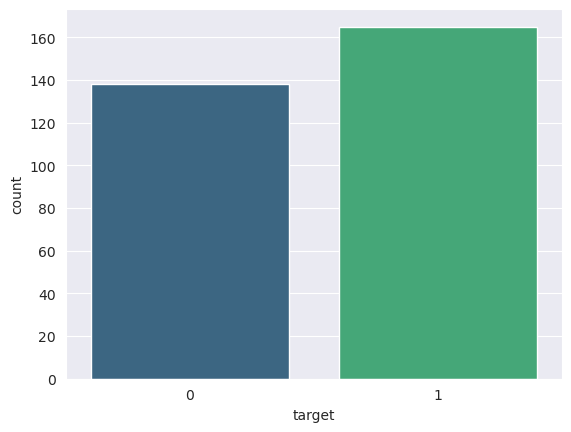

In [7]:
print(df.target.value_counts())
sns.set_style("darkgrid")
sns.countplot(x="target", data=df,palette="viridis");

From the above bar plot, it can be concluded that the classes are **unbalanced**, that is, there is less number of 0 (No Heart Disease) class target as compared to 1 (Heart Disease)

In [8]:
print(df["sex"].value_counts())
# 1 represents "Male" and 0 represents "Female"

pd.crosstab(df["target"], df["sex"])

1    207
0     96
Name: sex, dtype: int64


sex,0,1
target,,
0,24,114
1,72,93


**Observation:** We can infer that in this given dataset, 72 Women and 93 Men have Heart Disease.

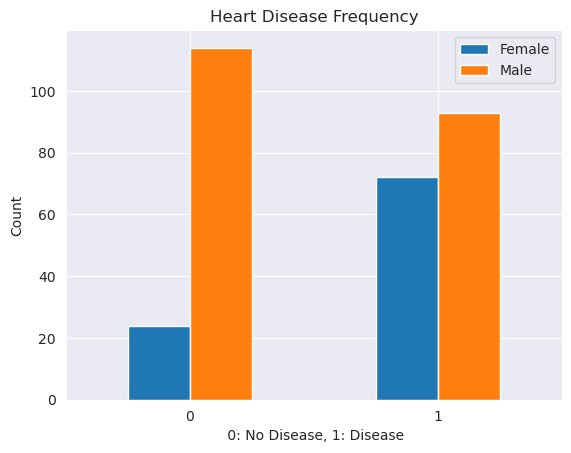

In [9]:
# Creating a plot for crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar")
plt.title("Heart Disease Frequency")
plt.xlabel(" 0: No Disease, 1: Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=360);

From the above barplot, we can conclude that **Males** are prone to having a heart disease as compared to **Females**. Also, it is observed, in this particular dataset, **Females** who have a heart disease is approximately three times more than **Females** who do not have a heart disease. 

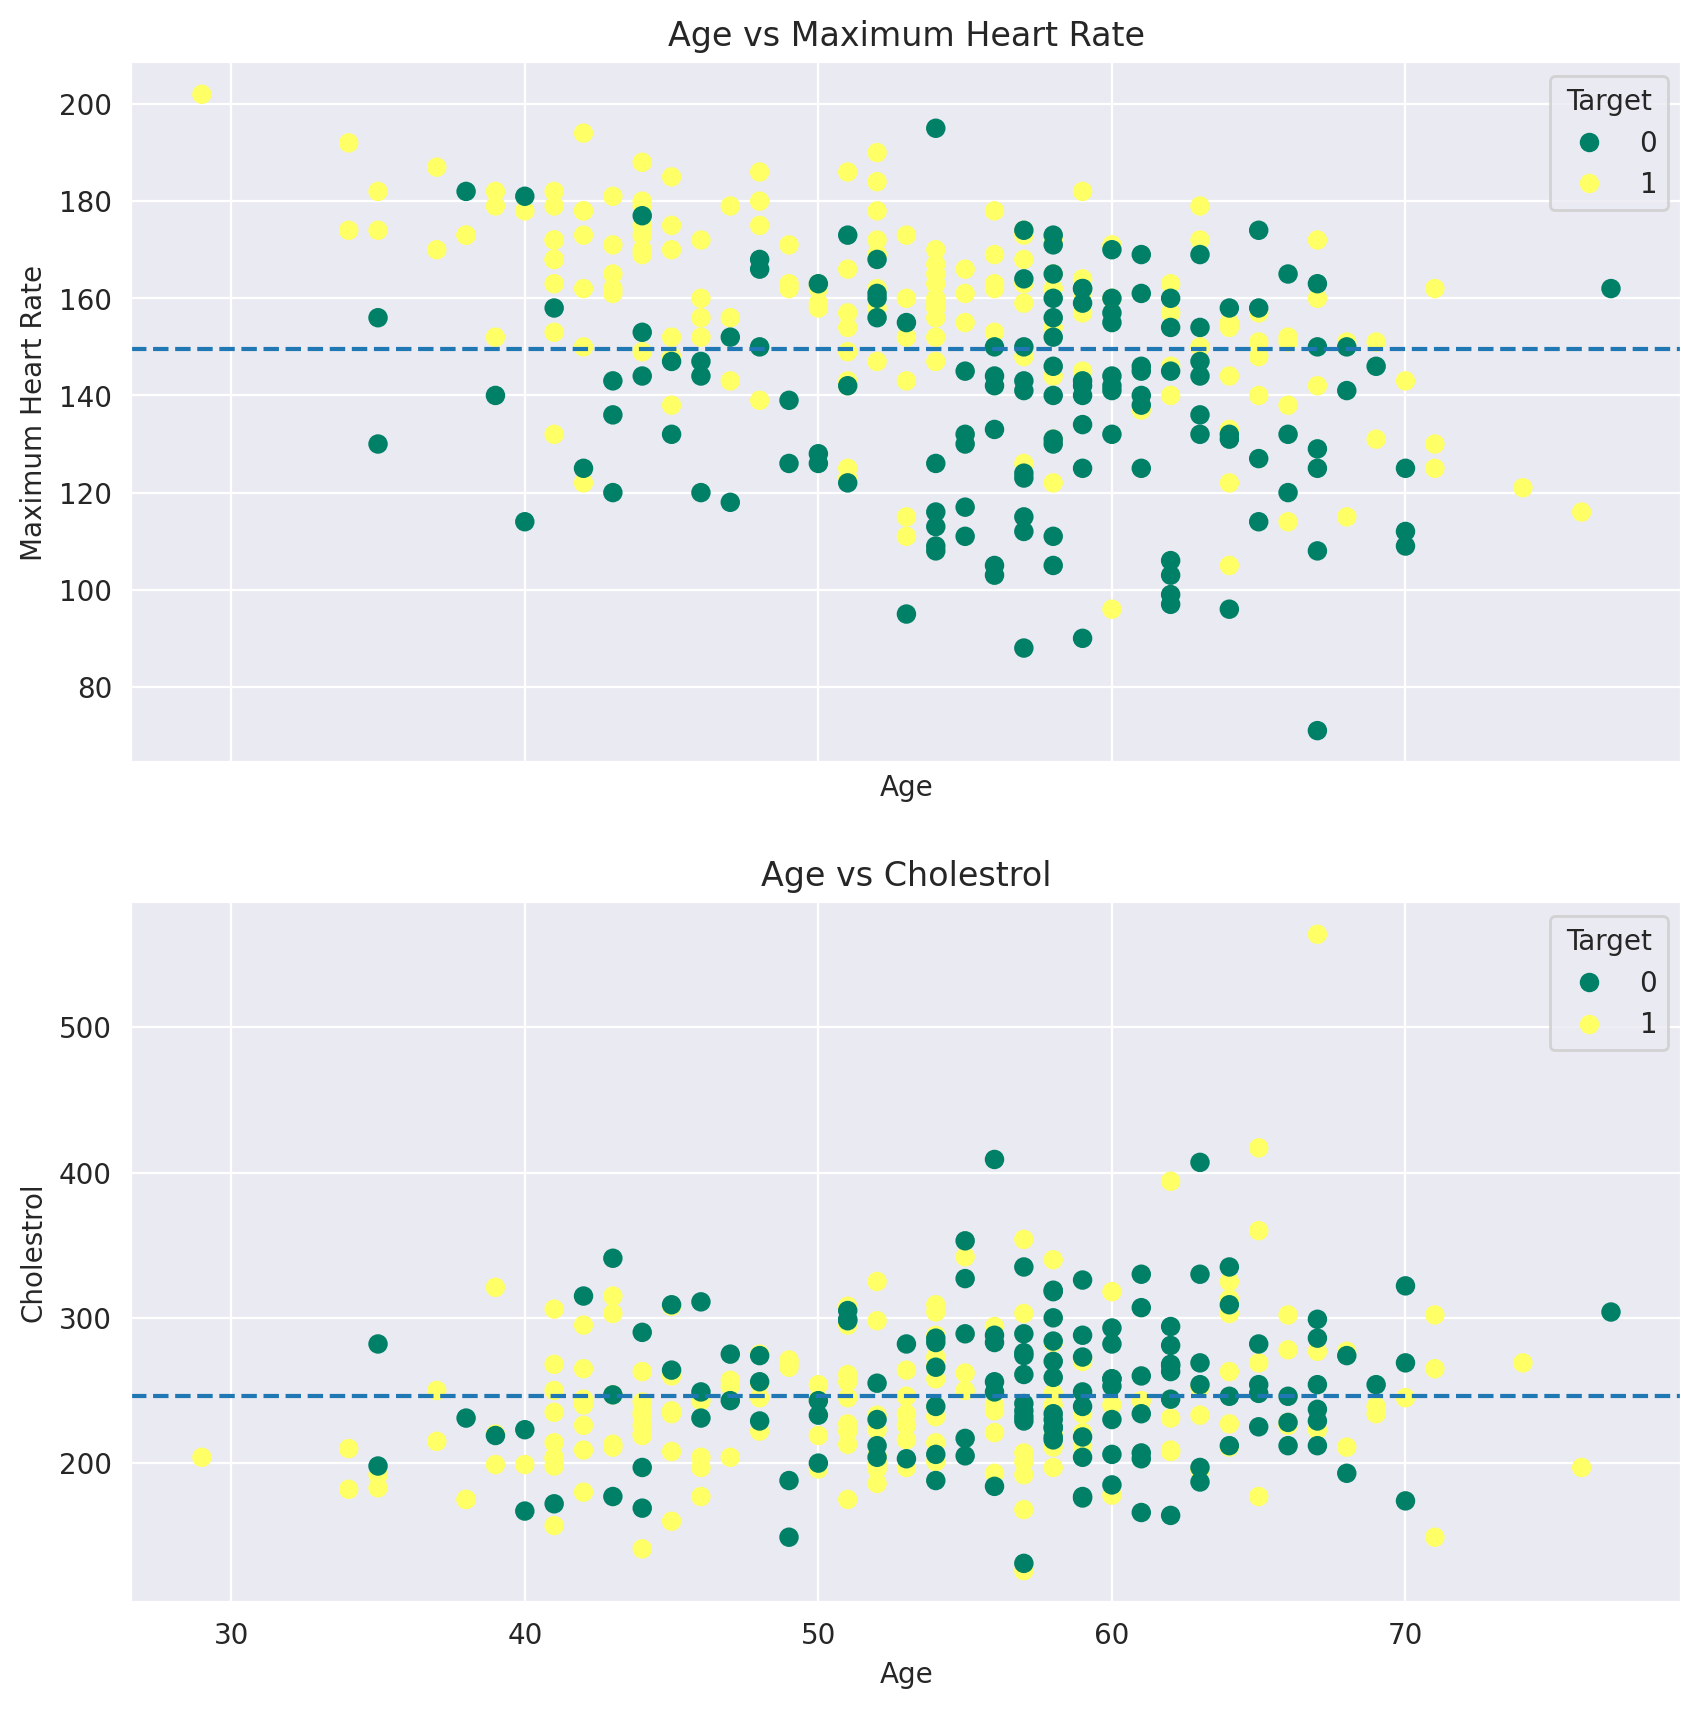

In [10]:
# Checking for total values in maximum heart rate and their unique values
df["thalach"].value_counts().unique()

#Creating a scatterplot for comparing maximum heart rate vs age
#Creating a scatterplot for comparing cholestrol vs age

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10), dpi=200,
                             sharex=True)

scatter1 = ax1.scatter(x="age", y="thalach",data=df,
                          c="target",
                      cmap="summer")
ax1.set(title="Age vs Maximum Heart Rate",
       xlabel="Age",
       ylabel="Maximum Heart Rate")
ax1.legend(*scatter1.legend_elements(), title="Target")
ax1.axhline(df["thalach"].mean(), ls="--")

scatter2 = ax2.scatter(x="age", y="chol",data=df,
                          c="target",
                      cmap="summer")
ax2.set(title="Age vs Cholestrol",
       xlabel="Age",
       ylabel="Cholestrol")
ax2.legend(*scatter2.legend_elements(), title="Target")
ax2.axhline(df["chol"].mean(), ls="--");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_28/1724756754.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


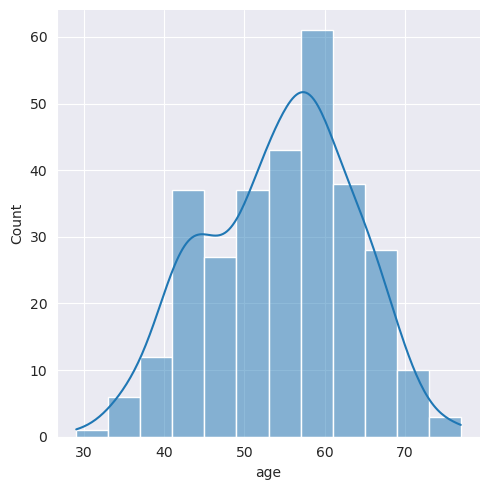

In [11]:
#Checking the distribution of "Age" feature
sns.displot(df["age"], kde=True)
plt.tight_layout()

<Axes: >

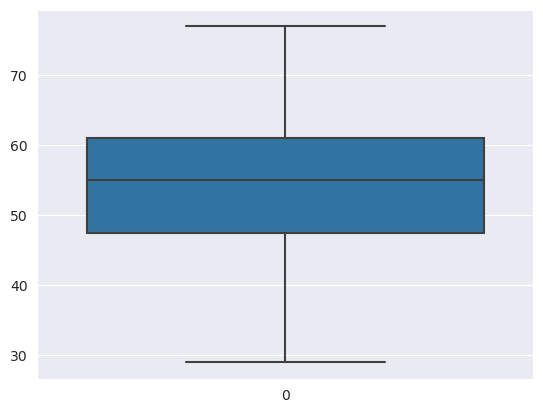

In [12]:
sns.boxplot(data=df["age"])

From the distribution plot, we can see **Age** follows a Normal distribution, and form the boxplot it can be said there are no outliers which can affect the end results.

**Box Plot Observation:**
1. Minimum age is around 30
2. First quartile is about 48
3. Median Age is 55
4. Third quartile is 62
3. Maximum age is 78

<Axes: >

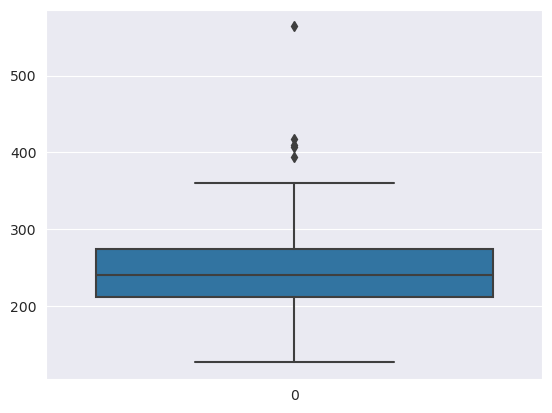

In [13]:
sns.boxplot(data=df["chol"])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


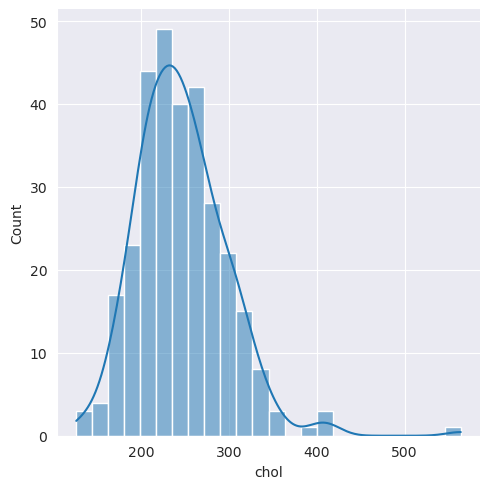

In [14]:
sns.displot(df["chol"], kde=True)

Here, it is seen there are some outliers, which potentially could be crucial in case of determining the heart disease. **Cholestrol** feature follows a log normal distribution. 

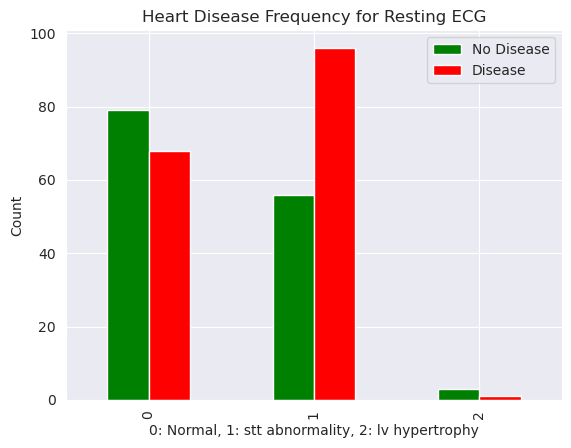

In [15]:
# Creating a plot of Resting ECG 
pd.crosstab(df["restecg"],df.target).plot(kind="bar", 
                                          color = ["green", "red"])
plt.title("Heart Disease Frequency for Resting ECG")
plt.xlabel("0: Normal, 1: stt abnormality, 2: lv hypertrophy")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"]);

Resting ECG is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.

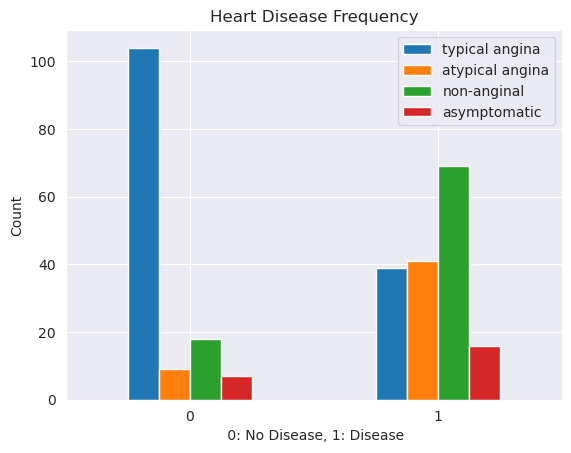

In [16]:
# Creating a plot for crosstab
pd.crosstab(df["target"], df["cp"]).plot(kind="bar")
plt.title("Heart Disease Frequency")
plt.xlabel(" 0: No Disease, 1: Disease")
plt.ylabel("Count")
plt.legend(["typical angina", "atypical angina",
            "non-anginal", "asymptomatic"])
plt.xticks(rotation=360);

In this particular dataset, individuals with non-anginal (non heart related) chest pain, tend to have a Heart Disease as compared to other types of chest pain. 

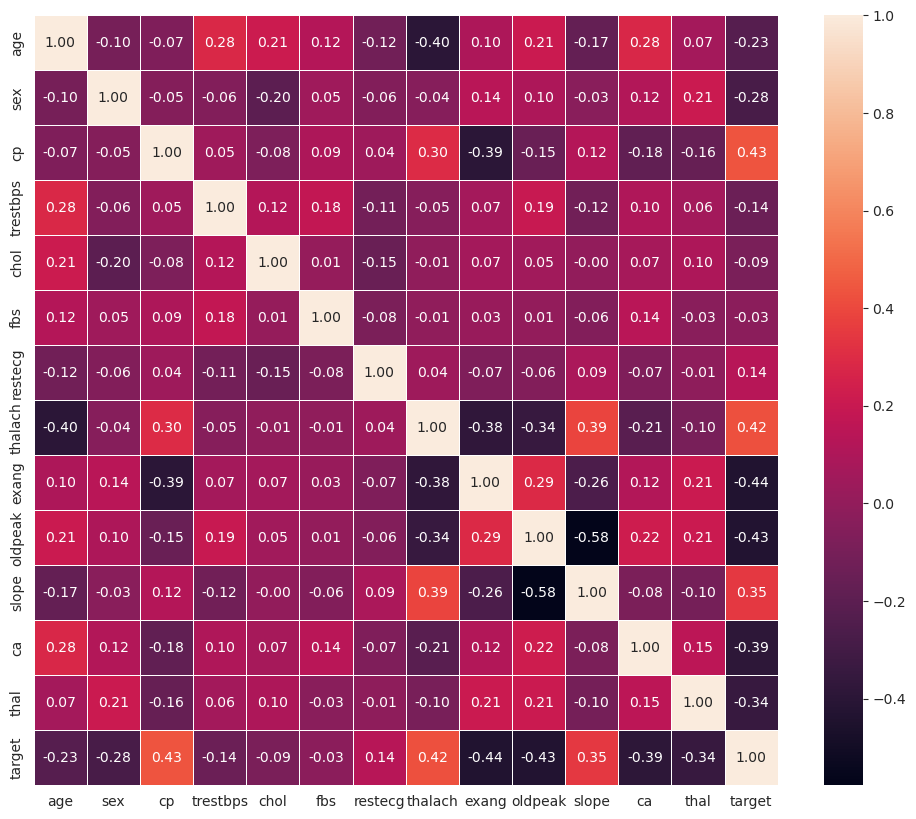

In [17]:
# For checking the correlation of features among different features
fig, ax = plt.subplots(figsize=(12,10), dpi=100)
ax= sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt=".2f");

## Modelling

In [18]:
# Independent (X) and Dependent variables (y)
X = df.drop("target", axis=1)
y = df["target"]


# Splitting into train, test split for training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=101)

### The models choices for our classification task:
1. Logistic Regression
2. K-Nearest Neighbours
3. Support Vector Classifier
4. Random Forest Classifier
5. Adaboost Classifier


#### Baseline Models:

In [19]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Support Vector": SVC(),
         "Random Forest": RandomForestClassifier(),
         "Adaboost": AdaBoostClassifier()}

def model_fit_and_score(models, X_train, y_train, X_test, y_test):
    """
    Fitting and evaluating model performance using .score metric 
    on X_train, y_train, and evaluating the results on a test data set
    X_test and comparing the results with actual y_test labels
    
    """
    np.random.seed(101)
    scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
        
    return scores

In [20]:
model_scores = model_fit_and_score(models,
                             X_train,
                             y_train,
                             X_test,
                             y_test)
print(f"Model Scores: \n {model_scores}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Scores: 
 {'Logistic Regression': 0.8688524590163934, 'KNN': 0.6557377049180327, 'Support Vector': 0.6065573770491803, 'Random Forest': 0.8360655737704918, 'Adaboost': 0.819672131147541}


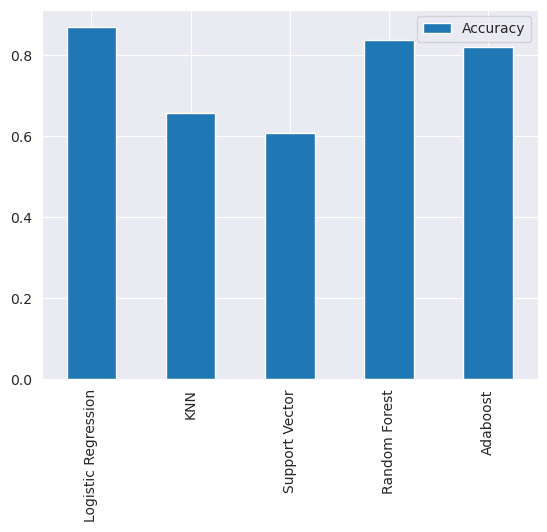

In [21]:
# Graphical Model COmparison
comparison=pd.DataFrame(model_scores, index = ["Accuracy"]
                       )
ax = comparison.T.plot.bar()

The results of the base models is decent, however, we had noticed that the target classes were imbalanced, therefore, checking the accuracy of a model could be misleading, as it would predict more of majority target class. 

Other crucial metrics to check for the model's performance:
1. Cross Validation
2. Confusion Matrix
3. Classification Report
4. Precision Score
5. Recall Score
6. F1 Score
7. ROC Curve
8. AUC

## Hyperparameter tuning using GridSearchCV

#### 1. Logistic Regression

In [22]:
np.random.seed(101)

logistic_param_grid = {"C": np.logspace(-3,3,30),
           "class_weight": ["balanced"],
           "solver": ["liblinear", "newton-cg", "lbfgs"],
           "penalty": ["l1", "l2", "elasticnet"]}



logistic_grid = GridSearchCV(LogisticRegression(),
                            param_grid=logistic_param_grid,
                            cv=5)

logistic_grid.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 1.61026203e-03, 2.59294380e-03, 4.17531894e-03,
       6.72335754e-03, 1.08263673e-02, 1.74332882e-02, 2.80721620e-02,
       4.52035366e-02, 7.27895384e-02, 1.17210230e-01, 1.88739182e-01,
       3.03919538e-01, 4.89390092e-01, 7.88046282e-01, 1.26896100e+00,
       2.04335972e+00, 3.29034456e+00, 5.29831691e+00, 8.53167852e+00,
       1.37382380e+01, 2.21221629e+01, 3.56224789e+01, 5.73615251e+01,
       9.23670857e+01, 1.48735211e+02, 2.39502662e+02, 3.85662042e+02,
       6.21016942e+02, 1.00000000e+03]),
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']})

Best Parameters for Logistic Regression for: {'C': 0.3039195382313198, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



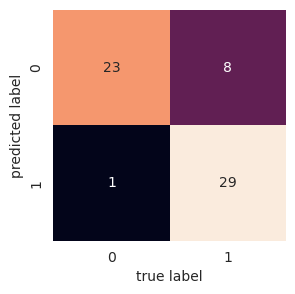

In [23]:
#Displaying best parameters selected for Logistic Regression Model
print(f"Best Parameters for Logistic Regression for: {logistic_grid.best_params_}")

# Making prediction on unseen data
y_pred = logistic_grid.predict(X_test)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)
print("\n")
print(classification_report(y_test, y_pred))

#### Evaluating cross- validated scores

In [24]:
model = LogisticRegression(C= 0.3039195382313198,
                           class_weight= 'balanced', 
                           penalty= 'l1', 
                           solver= 'liblinear')

from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print(f"Cross-validated Accuracy score: {np.mean(cv_acc)}")

cv_prec = cross_val_score(model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # precision as scoring
print(f"Cross-validated Precision score: {np.mean(cv_prec)}")

cv_rec = cross_val_score(model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # recall as scoring
print(f"Cross-validated Recall score: {np.mean(cv_rec)}")

cv_f1 = cross_val_score(model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
print(f"Cross-validated F1 score: {np.mean(cv_f1)}")

Cross-validated Accuracy score: 0.8250819672131147
Cross-validated Precision score: 0.8234942084942085
Cross-validated Recall score: 0.8727272727272727
Cross-validated F1 score: 0.8458724353808963


#### Feature Importance in Logistic Regression Model 

Coefficients: [[ 0.00771873 -0.75887326  0.75094185 -0.01448148 -0.0040701   0.
   0.00734756  0.02845878 -0.4201877  -0.40631113  0.32498408 -0.66931474
  -0.61401871]]


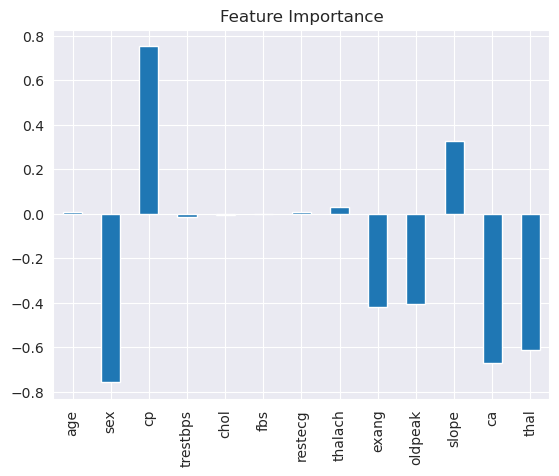

In [25]:
model.fit(X_train, y_train)
print(f"Coefficients: {model.coef_}")

# Matching features to columns
features_dict = dict(zip(df.columns, list(model.coef_[0])))

features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

#### 2. KNearest Neighbours Model

In [26]:

np.random.seed(101)

knn_param_grid = {"n_neighbors": range(1,41),
             "weights": ["uniform", "distance"],
              "algorithm":["auto", "ball_tree","kd_tree","brute"],
             "p":[1,2]}

knn_grid= GridSearchCV(KNeighborsClassifier(),
                       param_grid=knn_param_grid, 
                       cv=5)
knn_grid.fit(X_train,y_train)




GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 41), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

Best Parameters for KNearest Neighbours for: {'algorithm': 'auto', 'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.69      0.80      0.74        30

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



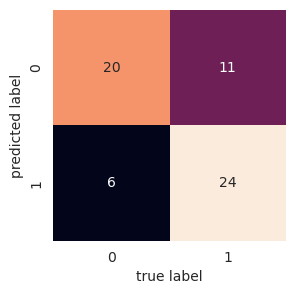

In [27]:
#Displaying best parameters selected for Logistic Regression Model
print(f"Best Parameters for KNearest Neighbours for: {knn_grid.best_params_}")

# Making prediction on unseen data
y_pred = knn_grid.predict(X_test)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)
print("\n")
print(classification_report(y_test, y_pred))

In [28]:
model1 = KNeighborsClassifier(algorithm= 'auto', 
                           n_neighbors= 23,
                           p= 1, 
                           weights= 'uniform')

from sklearn.model_selection import cross_val_score

cv_acc1 = cross_val_score(model1,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print(f"Cross-validated Accuracy score: {np.mean(cv_acc1)}")

cv_prec1 = cross_val_score(model1,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # precision as scoring
print(f"Cross-validated Precision score: {np.mean(cv_prec1)}")

cv_rec1 = cross_val_score(model1,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # recall as scoring
print(f"Cross-validated Recall score: {np.mean(cv_rec1)}")

cv_f1_1 = cross_val_score(model1,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
print(f"Cross-validated F1 score: {np.mean(cv_f1_1)}")

Cross-validated Accuracy score: 0.6763387978142077
Cross-validated Precision score: 0.6741472192049857
Cross-validated Recall score: 0.7878787878787878
Cross-validated F1 score: 0.7262543927883793


#### 3. Support Vector Machine Model

In [29]:
np.random.seed(101)

svc_param_grid = {"C": [0.1,0.01,0.001,0.5,1],
             "kernel": ["linear", "poly", "rbf", "sigmoid"],
              
             "degree":[2,3,4,5,6],
             "decision_function_shape": ["ovo","ovr"]}

svc_grid= GridSearchCV(SVC(),
                       param_grid=svc_param_grid, 
                       cv=5)
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 0.5, 1],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [2, 3, 4, 5, 6],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

Best Parameters for Support Vector Classifier for: {'C': 0.5, 'decision_function_shape': 'ovo', 'degree': 2, 'kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



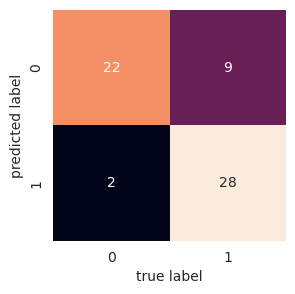

In [30]:
#Displaying best parameters selected for Logistic Regression Model
print(f"Best Parameters for Support Vector Classifier for: {svc_grid.best_params_}")

# Making prediction on unseen data
y_pred = svc_grid.predict(X_test)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)
print("\n")
print(classification_report(y_test, y_pred))

In [31]:
model2 = SVC(C= 0.5, 
             decision_function_shape= 'ovo', 
             degree= 2,
             kernel= 'linear')

from sklearn.model_selection import cross_val_score

cv_acc2 = cross_val_score(model2,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print(f"Cross-validated Accuracy score: {np.mean(cv_acc2)}")

cv_prec2 = cross_val_score(model2,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # precision as scoring
print(f"Cross-validated Precision score: {np.mean(cv_prec2)}")

cv_rec2 = cross_val_score(model2,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # recall as scoring
print(f"Cross-validated Recall score: {np.mean(cv_rec2)}")

cv_f1_2 = cross_val_score(model2,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
print(f"Cross-validated F1 score: {np.mean(cv_f1_2)}")

Cross-validated Accuracy score: 0.8284153005464482
Cross-validated Precision score: 0.8113828164161511
Cross-validated Recall score: 0.8969696969696971
Cross-validated F1 score: 0.8503008513281018


#### Feature Importance in Support Vector Classifier

Coefficients: [[ 0.01100303 -0.76332303  0.69044935 -0.01675376 -0.00316424 -0.01132089
   0.10032496  0.01533498 -0.62627713 -0.34079766  0.4032337  -0.46174121
  -0.75842536]]


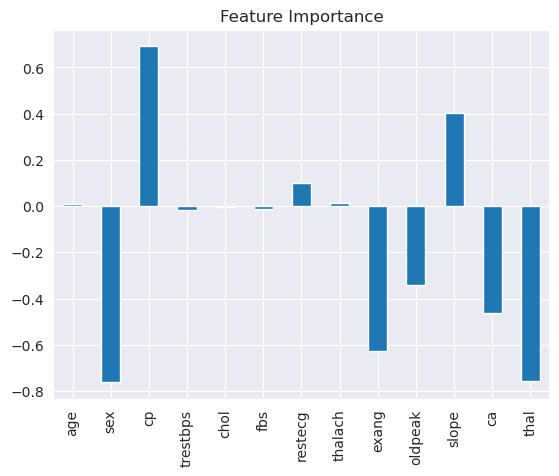

In [32]:
model2.fit(X_train, y_train)
print(f"Coefficients: {model2.coef_}")

# Matching features to columns
features_dict2 = dict(zip(df.columns, list(model2.coef_[0])))

features_df2 = pd.DataFrame(features_dict2, index=[0])
features_df2.T.plot.bar(title="Feature Importance", legend=False);

#### 4. Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(101)

decision_param_grid = {"criterion": ["gini", "entropy", "log_loss"],
             "max_features": ["auto", "sqrt", "log2"],
              
             "max_depth":[2,3,4,5,6],
             "max_leaf_nodes": [2,3,4,5,6]}

decision_grid= GridSearchCV(DecisionTreeClassifier(),
                       param_grid=decision_param_grid, 
                       cv=5)
decision_grid.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6]})

Best Parameters for Decision Tree Classifier for: {'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 2}


              precision    recall  f1-score   support

           0       0.78      0.45      0.57        31
           1       0.60      0.87      0.71        30

    accuracy                           0.66        61
   macro avg       0.69      0.66      0.64        61
weighted avg       0.69      0.66      0.64        61



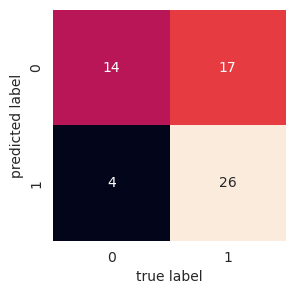

In [34]:
#Displaying best parameters selected for Logistic Regression Model
print(f"Best Parameters for Decision Tree Classifier for: {decision_grid.best_params_}")

# Making prediction on unseen data
y_pred = decision_grid.predict(X_test)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)
print("\n")
print(classification_report(y_test, y_pred))

In [35]:
model3 = DecisionTreeClassifier(criterion= 'log_loss', 
             max_depth= 4,
             max_features= 'sqrt', 
             max_leaf_nodes= 2)

from sklearn.model_selection import cross_val_score

cv_acc3 = cross_val_score(model3,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print(f"Cross-validated Accuracy score: {np.mean(cv_acc3)}")

cv_prec3 = cross_val_score(model3,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # precision as scoring
print(f"Cross-validated Precision score: {np.mean(cv_prec3)}")

cv_rec3 = cross_val_score(model3,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # recall as scoring
print(f"Cross-validated Recall score: {np.mean(cv_rec3)}")

cv_f1_3 = cross_val_score(model3,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
print(f"Cross-validated F1 score: {np.mean(cv_f1_3)}")

Cross-validated Accuracy score: 0.6960655737704918
Cross-validated Precision score: 0.7059129500989967
Cross-validated Recall score: 0.8
Cross-validated F1 score: 0.7530622148524962


#### Feature Importance in Decision Tree Classifier

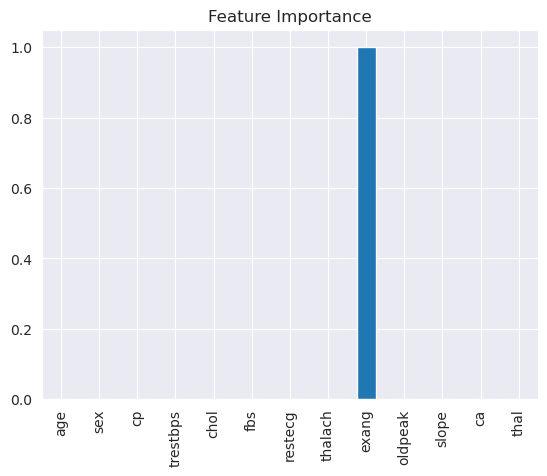

In [36]:
model3.fit(X_train, y_train)

# Matching features to columns
features_dict3 = dict(zip(df.columns, list(model3.feature_importances_)))

features_df3 = pd.DataFrame(features_dict3, index=[0])
features_df3.T.plot.bar(title="Feature Importance", legend=False);

#### 5. Random Forest Classifier Model

In [37]:
np.random.seed(101)

rfc_param_grid = {"n_estimators": [64,100,128,200],
             "criterion": ["gini","entropy","log_loss"],
             "max_depth": [2,3,4,5,6],
             "max_features": ["sqrt", "log2"],
             "bootstrap": [True, False],
             "oob_score": [True, False],
             "class_weight": ["balanced"]}

rfc_grid= GridSearchCV(RandomForestClassifier(),
                       param_grid=rfc_param_grid, 
                       cv=5)
rfc_grid.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/opt/conda

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

Best Parameters for Random Forest Classifier for: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 128, 'oob_score': False}


              precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.75      0.80      0.77        30

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



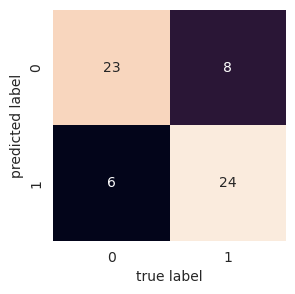

In [38]:
#Displaying best parameters selected for Logistic Regression Model
print(f"Best Parameters for Random Forest Classifier for: {rfc_grid.best_params_}")

# Making prediction on unseen data
y_pred = rfc_grid.predict(X_test)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)
print("\n")
print(classification_report(y_test, y_pred))

In [39]:
model4 = RandomForestClassifier(bootstrap= False, 
                                class_weight= 'balanced', 
                                criterion= 'gini',
                                max_depth= 2,
                                max_features= 'log2', 
                                n_estimators= 128, 
                                oob_score= False)

from sklearn.model_selection import cross_val_score

cv_acc4 = cross_val_score(model4,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print(f"Cross-validated Accuracy score: {np.mean(cv_acc4)}")

cv_prec4 = cross_val_score(model4,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # precision as scoring
print(f"Cross-validated Precision score: {np.mean(cv_prec4)}")

cv_rec4 = cross_val_score(model4,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # recall as scoring
print(f"Cross-validated Recall score: {np.mean(cv_rec4)}")

cv_f1_4 = cross_val_score(model4,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
print(f"Cross-validated F1 score: {np.mean(cv_f1_4)}")

Cross-validated Accuracy score: 0.8414207650273224
Cross-validated Precision score: 0.8365476754471063
Cross-validated Recall score: 0.8545454545454545
Cross-validated F1 score: 0.8522943722943722


#### Feature Importance in Random Forest Classifier

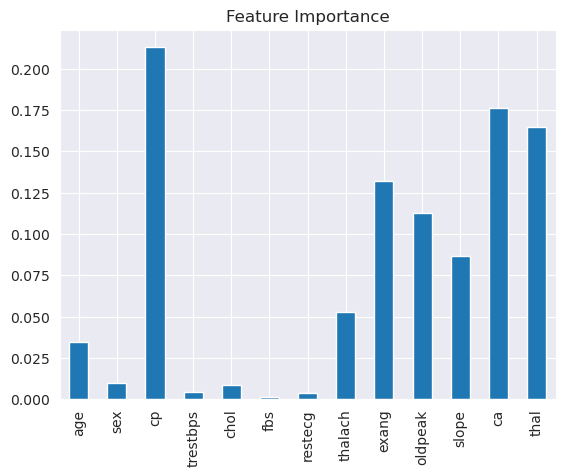

In [40]:
model4.fit(X_train, y_train)

# Matching features to columns
features_dict4 = dict(zip(df.columns, list(model4.feature_importances_)))

features_df4 = pd.DataFrame(features_dict4, index=[0])
features_df4.T.plot.bar(title="Feature Importance", legend=False);

#### 6. Adaboost Classifier Model

In [41]:
np.random.seed(101)

ada_param_grid = {"n_estimators": [64,100,128,200],
             
             "learning_rate": [0.1,0.01,0.001,0.0001]}
ada_grid= GridSearchCV(AdaBoostClassifier(),
                       param_grid=ada_param_grid, 
                       cv=5)
ada_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [64, 100, 128, 200]})

Best Parameters for Adaboost Classifier for: {'learning_rate': 0.1, 'n_estimators': 64}


              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



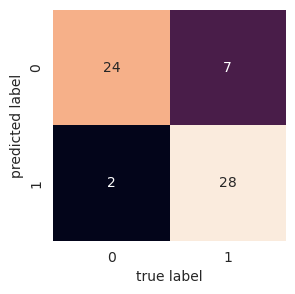

In [42]:
#Displaying best parameters selected for Logistic Regression Model
print(f"Best Parameters for Adaboost Classifier for: {ada_grid.best_params_}")

# Making prediction on unseen data
y_pred = ada_grid.predict(X_test)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)
print("\n")
print(classification_report(y_test, y_pred))

In [43]:
model5 = AdaBoostClassifier(learning_rate=0.01,
                           n_estimators=64)

from sklearn.model_selection import cross_val_score

cv_acc5 = cross_val_score(model5,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
print(f"Cross-validated Accuracy score: {np.mean(cv_acc5)}")

cv_prec5 = cross_val_score(model5,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # precision as scoring
print(f"Cross-validated Precision score: {np.mean(cv_prec5)}")

cv_rec5 = cross_val_score(model5,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # recall as scoring
print(f"Cross-validated Recall score: {np.mean(cv_rec5)}")

cv_f1_5 = cross_val_score(model5,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
print(f"Cross-validated F1 score: {np.mean(cv_f1_5)}")

Cross-validated Accuracy score: 0.8019125683060111
Cross-validated Precision score: 0.796729795667177
Cross-validated Recall score: 0.8606060606060606
Cross-validated F1 score: 0.8254309858271668


#### Feature Importance in Adaboost Classifier

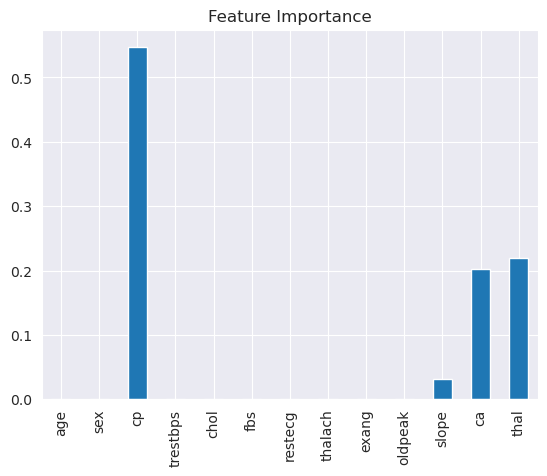

In [44]:
model5.fit(X_train, y_train)

# Matching features to columns
features_dict5 = dict(zip(df.columns, list(model5.feature_importances_)))

features_df5 = pd.DataFrame(features_dict5, index=[0])
features_df5.T.plot.bar(title="Feature Importance", legend=False);

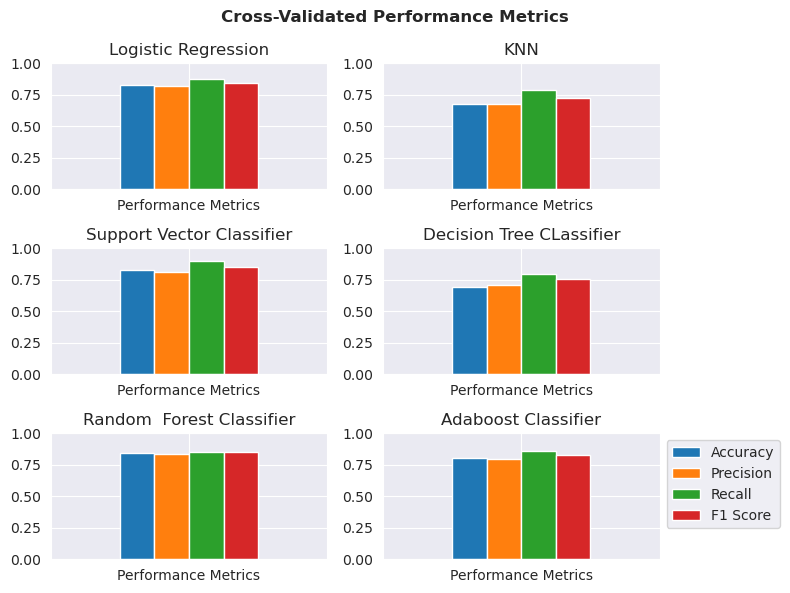

In [49]:
#cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize = (8,6))
fig.suptitle('Cross-Validated Performance Metrics', fontname="Times New Roman", fontweight="bold")
cv_metrics = pd.DataFrame([np.mean(cv_acc), np.mean(cv_prec), np.mean(cv_rec), np.mean(cv_f1)], 
                          index = ["Accuracy", "Precision", "Recall", "F1 Score"],
                         columns=["Performance Metrics"])

cv_metrics.T.plot.bar(title = "Logistic Regression", ax=ax1, legend=False)


cv_metrics1 = pd.DataFrame([np.mean(cv_acc1), np.mean(cv_prec1), np.mean(cv_rec1), np.mean(cv_f1_1)], 
                          index = ["Accuracy", "Precision", "Recall", "F1 Score"],
                         columns=["Performance Metrics"])

cv_metrics1.T.plot.bar(title = "KNN", ax=ax2, legend=False)


cv_metrics2 = pd.DataFrame([np.mean(cv_acc2), np.mean(cv_prec2), np.mean(cv_rec2), np.mean(cv_f1_2)], 
                          index = ["Accuracy", "Precision", "Recall", "F1 Score"],
                         columns=["Performance Metrics"])

cv_metrics2.T.plot.bar(title = "Support Vector Classifier", ax=ax3, legend=False)


cv_metrics3 = pd.DataFrame([np.mean(cv_acc3), np.mean(cv_prec3), np.mean(cv_rec3), np.mean(cv_f1_3)], 
                          index = ["Accuracy", "Precision", "Recall", "F1 Score"],
                         columns=["Performance Metrics"])

cv_metrics3.T.plot.bar(title = "Decision Tree CLassifier", ax=ax4, legend=False)


cv_metrics4 = pd.DataFrame([np.mean(cv_acc4), np.mean(cv_prec4), np.mean(cv_rec4), np.mean(cv_f1_4)], 
                          index = ["Accuracy", "Precision", "Recall", "F1 Score"],
                         columns=["Performance Metrics"])

cv_metrics4.T.plot.bar(title = "Random  Forest Classifier", ax=ax5, legend=False)


cv_metrics5 = pd.DataFrame([np.mean(cv_acc5), np.mean(cv_prec5), np.mean(cv_rec5), np.mean(cv_f1_5)], 
                          index = ["Accuracy", "Precision", "Recall", "F1 Score"],
                         columns=["Performance Metrics"])

cv_metrics5.T.plot.bar(title = "Adaboost Classifier", ax=ax6, legend=False)

# Set y-axis limits for each subplot
ax1.set_ylim(0, 1)  # Adjust the limits as needed
ax2.set_ylim(0, 1)  # Adjust the limits as needed
ax3.set_ylim(0, 1)  # Adjust the limits as needed
ax4.set_ylim(0, 1)  # Adjust the limits as needed
ax5.set_ylim(0, 1)  # Adjust the limits as needed
ax6.set_ylim(0, 1)  # Adjust the limits as needed

# Set x-axis tick label rotation for each subplot to 360 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=360)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=360)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=360)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=360)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=360)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=360)

# Add a legend for the entire figure
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plots
plt.tight_layout()
plt.show()

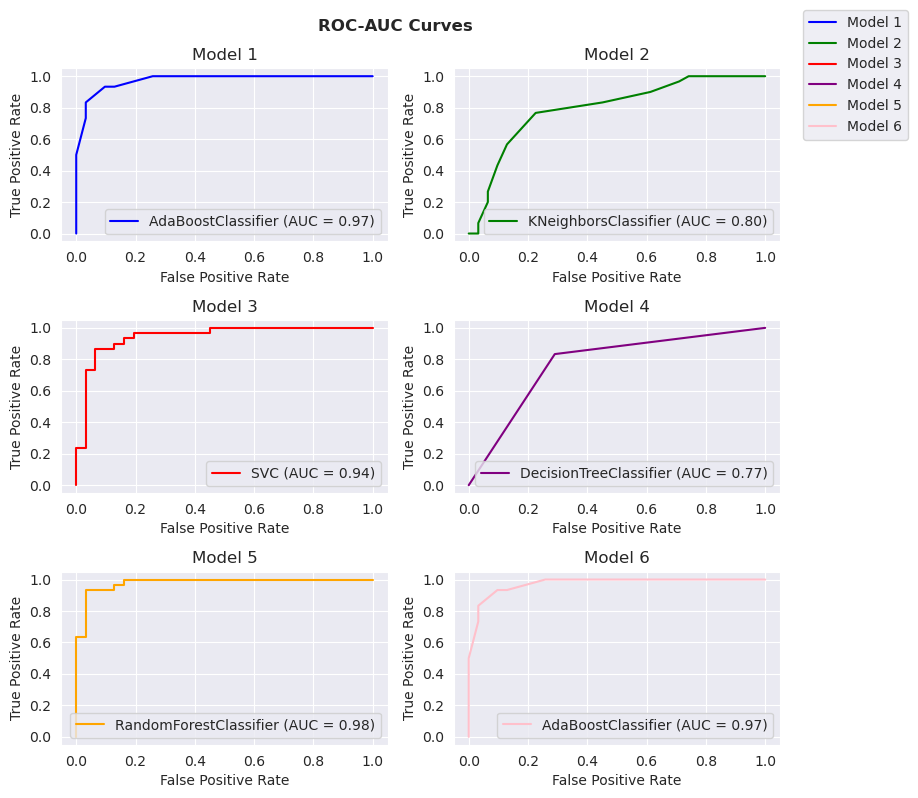

In [50]:
# Define a list of colors for each plot
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

# Fit each model to the test data
model.fit(X_test, y_test)
model1.fit(X_test, y_test)
model2.fit(X_test, y_test)
model3.fit(X_test, y_test)
model4.fit(X_test, y_test)
model5.fit(X_test, y_test)

# Create the subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(8, 8))
fig.suptitle("ROC-AUC Curves", fontname="Times New Roman", fontweight="bold")

# Initialize an empty list to collect legend labels
legend_labels = []

# Plot ROC curves with different colors for each model
for i, (model, ax) in enumerate(zip([model, model1, model2, model3, model4, model5], [ax1, ax2, ax3, ax4, ax5, ax6])):
    
    RocCurveDisplay.from_estimator(estimator=model, 
                                   X=X_test, 
                                   y=y_test, 
                                   ax=ax, 
                                   color=colors[i])
    legend_labels.append(f"Model {i+1}")  # Add label to the legend_labels list
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")

# Add a legend outside of the figure
fig.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.15, 1))

# Customize other plot settings as needed
ax1.set_title("Model 1")
ax2.set_title("Model 2")
ax3.set_title("Model 3")
ax4.set_title("Model 4")
ax5.set_title("Model 5")
ax6.set_title("Model 6")

# Show the plots
plt.tight_layout()
plt.show()

#### **Conclusion**: 
From all the performance metrics, it can be concluded that **Random Forest CLassifier** and **Adaboost Classifier** perform exceptionally well for this particular dataset, and are able to classify the target classes well. 
